In [46]:
import numpy as np
import pandas as pd
from os import path
import matplotlib.pyplot as plt
import seaborn as sns

raw_data_rel_path = "../../data/raw"

Filenames

In [47]:
buzzfeed_fake_file = "BuzzFeed_fake_news_content.csv"
buzzfeed_real_file = "BuzzFeed_real_news_content.csv"
politifact_fake_file = "PolitiFact_fake_news_content.csv"
politifact_real_file = "PolitiFact_real_news_content.csv"

politifact_original_file = "politifact_original.csv"

fake_file = "fake.csv"

# Variable to concatenate all the extra data and then concat to the CLEF2021 data set
extra_df = None

In [48]:
# !pip install pyarrow fastparquet

___
## Dataset: "Fake News Net"

Link: https://www.kaggle.com/datasets/mdepak/fakenewsnet?select=BuzzFeed_fake_news_content.csv

In [49]:
bf_real = pd.read_csv(path.join(raw_data_rel_path, buzzfeed_real_file))
bf_fake = pd.read_csv(path.join(raw_data_rel_path, buzzfeed_fake_file))
pf_real = pd.read_csv(path.join(raw_data_rel_path, politifact_real_file))
pf_fake = pd.read_csv(path.join(raw_data_rel_path, politifact_fake_file))

In [50]:
bf_real.head(3)

id                                              title  \
0   Real_1-Webpage  Another Terrorist Attack in NYC…Why Are we STI...   
1  Real_10-Webpage  Donald Trump: Drugs a 'Very, Very Big Factor' ...   
2  Real_11-Webpage  Obama To UN: ‘Giving Up Liberty, Enhances Secu...   

                                                text  \
0  On Saturday, September 17 at 8:30 pm EST, an e...   
1  Less than a day after protests over the police...   
2  Obama To UN: ‘Giving Up Liberty, Enhances Secu...   

                                                 url  \
0  http://eaglerising.com/36942/another-terrorist...   
1                             http://abcn.ws/2d4lNn9   
2  http://rightwingnews.com/barack-obama/obama-un...   

                                             top_img  \
0  http://eaglerising.com/wp-content/uploads/2016...   
1  http://a.abcnews.com/images/Politics/AP_donald...   
2  http://rightwingnews.com/wp-content/uploads/20...   

                                       authors                    source  \
0              View All Posts,Leonora Cravotta    http://eaglerising.com   
1  More Candace,Adam Kelsey,Abc News,More Adam            http://abcn.ws   
2                                  Cassy Fiano  http://rightwingnews.com   

               publish_date                                     movies  \
0  {'$date': 1474528230000}                                        NaN   
1                       NaN                                        NaN   
2  {'$date': 1474476044000}  https://www.youtube.com/embed/ji6pl5Vwrvk   

                                              images  \
0  http://constitution.com/wp-content/uploads/201...   
1  http://www.googleadservices.com/pagead/convers...   
2  http://rightwingnews.com/wp-content/uploads/20...   

                                      canonical_link  \
0  http://eaglerising.com/36942/another-terrorist...   
1  http://abcnews.go.com/Politics/donald-trump-dr...   
2  http://rightwingnews.com/barack-obama/obama-un...   

                                           meta_data  
0  {"description": "\u201cWe believe at this poin...  
1  {"fb_title": "Trump: Drugs a 'Very, Very Big F...  
2  {"googlebot": "noimageindex", "og": {"site_nam...

Keep only `id`, `title`, `text` and then add a column `rating` with `true` or `false` depending on the dataset.

In [51]:
# Can't use a loop because of the pass-by-assignment thing in Python
bf_real = bf_real[['id', 'text', 'title']]
bf_real['rating'] = 'true'

bf_fake = bf_fake[['id', 'text', 'title']]
bf_fake['rating'] = 'false'

pf_real = pf_real[['id', 'text', 'title']]
pf_real['rating'] = 'true'

pf_fake = pf_fake[['id', 'text', 'title']]
pf_fake['rating'] = 'false'

Concatenate in the cumulative dataframe `extra_df`

In [52]:
extra_df = pd.concat([bf_real, bf_fake])
extra_df = pd.concat([extra_df, pf_real])
extra_df = pd.concat([extra_df, pf_fake])

In [53]:
extra_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 422 entries, 0 to 119
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      422 non-null    object
 1   text    422 non-null    object
 2   title   422 non-null    object
 3   rating  422 non-null    object
dtypes: object(4)
memory usage: 16.5+ KB


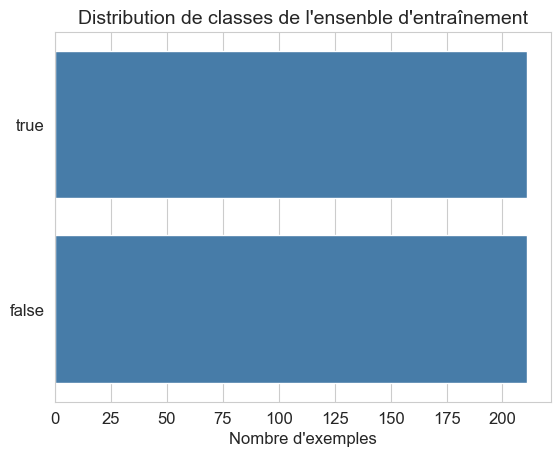

In [70]:
# Here we have a list of the color palettes: https://www.codecademy.com/article/seaborn-design-ii
# Another reference: https://medium.com/@morganjonesartist/color-guide-to-seaborn-palettes-da849406d44f
palette = sns.color_palette('Set1')
sns.set_style('whitegrid')
ax: 'plt.Axes' = sns.barplot(x=extra_df['rating'].value_counts(), y=extra_df['rating'].value_counts().index, orient='h', color=palette[1])
_ = ax.set_title("Distribution de classes de l'ensenble d'entraînement", size=14)
_ = ax.set_xlabel("Nombre d'exemples", fontsize=12)
ax.tick_params(axis='both', labelsize=12)
plt.show()

<h5>
This data set is balanced but it misses two categories. Could we find them examples for `partially false` and `other` in other data sets?
</h5>

___
## Dataset: "Fakenews Classification Datasets"

Link: https://www.kaggle.com/datasets/liberoliber/onion-notonion-datasets?select=politifact_original.csv

In [54]:
pf_original = pd.read_csv(path.join(raw_data_rel_path, politifact_original_file), on_bad_lines='warn')

Skipping line 14389: expected 16 fields, saw 18



In [55]:
pf_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25229 entries, 0 to 25228
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   politifact_url_phase1          25229 non-null  object
 1   fact_tag_phase1                25229 non-null  object
 2   article_title_phase1           25229 non-null  object
 3   article_claim_phase1           25229 non-null  object
 4   article_claim_citation_phase1  25229 non-null  object
 5   article_published_date_phase1  25229 non-null  object
 6   article_researched_by_phase1   25198 non-null  object
 7   article_edited_by_phase1       25157 non-null  object
 8   article_categories_phase1      25229 non-null  object
 9   original_url_phase1            25229 non-null  object
 10  page_is_first_citation_phase1  25229 non-null  bool  
 11  error_phase2                   25229 non-null  object
 12  original_article_text_phase2   25229 non-null  object
 13  a

In [56]:
with pd.option_context('display.max_rows', 30,
                       'display.max_colwidth', 256,
                       ):
    display(pf_original.head(3))

politifact_url_phase1  \
0  http://www.politifact.com/punditfact/statements/2018/jun/18/gateway-pundit/headline-says-trump-tied-obama-same-point-presiden/   
1  http://www.politifact.com/punditfact/statements/2018/jun/18/gateway-pundit/headline-says-trump-tied-obama-same-point-presiden/   
2  http://www.politifact.com/punditfact/statements/2018/jun/18/gateway-pundit/headline-says-trump-tied-obama-same-point-presiden/   

  fact_tag_phase1  \
0     Mostly True   
1     Mostly True   
2     Mostly True   

                                                    article_title_phase1  \
0  Story says poll shows Trump tied to Obama at same point in presidency   
1  Story says poll shows Trump tied to Obama at same point in presidency   
2  Story says poll shows Trump tied to Obama at same point in presidency   

                                                                        article_claim_phase1  \
0  "Trump approval rating better than Obama and Reagan at same point in their presidencies."   
1  "Trump approval rating better than Obama and Reagan at same point in their presidencies."   
2  "Trump approval rating better than Obama and Reagan at same point in their presidencies."   

                                                               article_claim_citation_phase1  \
0  "Trump approval rating better than Obama and Reagan at same point in their presidencies."   
1  "Trump approval rating better than Obama and Reagan at same point in their presidencies."   
2  "Trump approval rating better than Obama and Reagan at same point in their presidencies."   

          article_published_date_phase1 article_researched_by_phase1  \
0  Monday, June 18th, 2018 at 9:00 a.m.                  Amy Sherman   
1  Monday, June 18th, 2018 at 9:00 a.m.                  Amy Sherman   
2  Monday, June 18th, 2018 at 9:00 a.m.                  Amy Sherman   

  article_edited_by_phase1            article_categories_phase1  \
0            Katie Sanders  Fake news, Polls and Public Opinion   
1            Katie Sanders  Fake news, Polls and Public Opinion   
2            Katie Sanders  Fake news, Polls and Public Opinion   

                                                                                                  original_url_phase1  \
0         http://www.foxnews.com/politics/2018/06/08/trump-jump-in-polls-despite-medias-gloom-and-doom-portrayal.html   
1  https://www.nbcnews.com/politics/first-read/poll-economic-satisfaction-under-trump-isn-t-helping-his-party-n880721   
2                                                   https://fivethirtyeight.com/features/is-rasmussen-reports-biased/   

   page_is_first_citation_phase1 error_phase2  \
0                          False     No Error   
1                          False     No Error   
2                          False     No Error   

                                                                                                                                                                                                                                      original_article_text_phase2  \
0  The bleak presidential portrait painted by the media keeps getting darker: Donald Trump is spinning out of control, calling the Mueller probe unconstitutional, claiming he can pardon himself, embracing a lawyer who says he could shoot Jim Comey and not...   
1  Breaking News Emails Get breaking news alerts and special reports. The news and stories that matter, delivered weekday mornings. By a whopping 25-point margin, voters say theyre more likely to back a congressional candidate who promises to serve as a c...   
2  Theres a big, slow-news-weekend story over at Politico today over allegations made by certain Democrats and liberals that the prolific polling firm Rasmussen Reports is biased toward conservative and Republican causes. I have to catch a flight (weather...   

                                                                          article_title_phase2  \
0                       A Tr

Rename the column 'type' to 'rating' for consistency across datasets.

In [57]:
pf_original.rename(columns={'fact_tag_phase1': 'rating'}, inplace=True)

In [58]:
pf_original['rating'].value_counts()

Half-True         5095
False             4736
Mostly True       4687
Mostly False      4661
True              2922
Pants on Fire!    2792
Full Flop          186
Half Flip          107
No Flip             43
Name: rating, dtype: int64

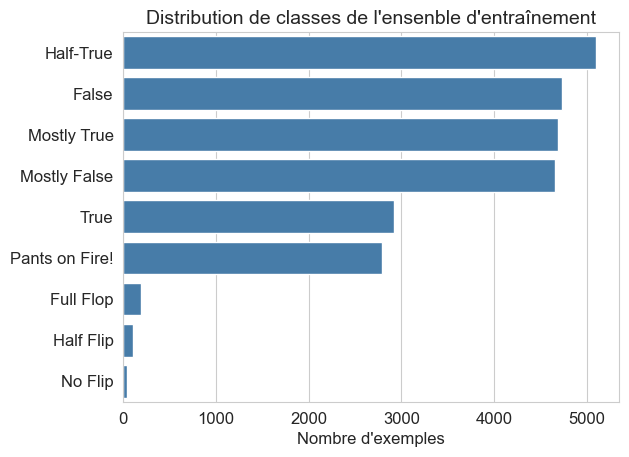

In [59]:
# Here we have a list of the color palettes: https://www.codecademy.com/article/seaborn-design-ii
# Another reference: https://medium.com/@morganjonesartist/color-guide-to-seaborn-palettes-da849406d44f
palette = sns.color_palette('Set1')
sns.set_style('whitegrid')
ax: 'plt.Axes' = sns.barplot(x=pf_original['rating'].value_counts(), y=pf_original['rating'].value_counts().index, orient='h', color=palette[1])
_ = ax.set_title("Distribution de classes de l'ensenble d'entraînement", size=14)
_ = ax.set_xlabel("Nombre d'exemples", fontsize=12)
ax.tick_params(axis='both', labelsize=12)
plt.show()

About tags. From politifact [site](https://www.politifact.com/article/2018/feb/12/principles-truth-o-meter-politifacts-methodology-i/):
 
How we determine Truth-O-Meter ratings

The goal of the Truth-O-Meter is to reflect the relative accuracy of a statement. The meter has six ratings, in decreasing level of truthfulness:
- TRUE – The statement is accurate and there’s nothing significant missing.
- MOSTLY TRUE – The statement is accurate but needs clarification or additional information.
- HALF TRUE – The statement is partially accurate but leaves out important details or takes things out of context.
- MOSTLY FALSE – The statement contains an element of truth but ignores critical facts that would give a different impression.
- FALSE – The statement is not accurate.
- PANTS ON FIRE – The statement is not accurate and makes a ridiculous claim.

<h5>
NOTES

- `politifact_url_phase1`: url to the politifact article (not the actual news)
- `fact_tag_phase1`: the rating of the claim being evaluated (`article_claim_phase1`).
- `article_title_phase1`: title of the politifact article. It's like a post in which the author determines if another article, **the actual news**, is true, false, etc.
- `article_claim_phase1`: **the main claim of the real article being evaluated. Unfortunately the dataset doesn't provide the full text nor the title of the real article.**
- `original_url_phase1`: url of a reference used by the politifact post. This reference is used as to debunk or support the author's review.
- `original_article_text_phase2`: text of the article used as reference by the politifact author.
- `article_title_phase2`: title of the article used as reference by the politifact author.

**We can't use this data set**

The title of the article does not belong to the article being evaluated. Also, we don't have access to the text, even though we could use the claim.
**Note**: we could just simplify the task and throw away the title and work just with the claim.
</h5>

___
## Dataset: "Getting Real about Fake News"

Link: https://www.kaggle.com/datasets/mrisdal/fake-news


Extracted from the source:

Contents

The dataset contains text and metadata from 244 websites and represents 12,999 posts in total from the past 30 days. The data was pulled using the webhose.io API; because it's coming from their crawler, not all websites identified by the BS Detector are present in this dataset. Each website was labeled according to the BS Detector as documented here. Data sources that were missing a label were simply assigned a label of "bs". There are (ostensibly) no genuine, reliable, or trustworthy news sources represented in this dataset (so far), so don't trust anything you read.

In [60]:
fake_df = pd.read_csv(path.join(raw_data_rel_path, fake_file), on_bad_lines='warn')

In [61]:
fake_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12999 entries, 0 to 12998
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   uuid                12999 non-null  object 
 1   ord_in_thread       12999 non-null  int64  
 2   author              10575 non-null  object 
 3   published           12999 non-null  object 
 4   title               12319 non-null  object 
 5   text                12953 non-null  object 
 6   language            12999 non-null  object 
 7   crawled             12999 non-null  object 
 8   site_url            12999 non-null  object 
 9   country             12823 non-null  object 
 10  domain_rank         8776 non-null   float64
 11  thread_title        12987 non-null  object 
 12  spam_score          12999 non-null  float64
 13  main_img_url        9356 non-null   object 
 14  replies_count       12999 non-null  int64  
 15  participants_count  12999 non-null  int64  
 16  like

In [62]:
fake_df.rename(columns={'uuid': 'id'}, inplace=True)

In [63]:
fake_df.head(3)

id  ord_in_thread  \
0  6a175f46bcd24d39b3e962ad0f29936721db70db              0   
1  2bdc29d12605ef9cf3f09f9875040a7113be5d5b              0   
2  c70e149fdd53de5e61c29281100b9de0ed268bc3              0   

                 author                      published  \
0     Barracuda Brigade  2016-10-26T21:41:00.000+03:00   
1  reasoning with facts  2016-10-29T08:47:11.259+03:00   
2     Barracuda Brigade  2016-10-31T01:41:49.479+02:00   

                                               title  \
0  Muslims BUSTED: They Stole Millions In Gov’t B...   
1  Re: Why Did Attorney General Loretta Lynch Ple...   
2  BREAKING: Weiner Cooperating With FBI On Hilla...   

                                                text language  \
0  Print They should pay all the back all the mon...  english   
1  Why Did Attorney General Loretta Lynch Plead T...  english   
2  Red State : \nFox News Sunday reported this mo...  english   

                         crawled             site_url country  domain_rank  \
0  2016-10-27T01:49:27.168+03:00  100percentfedup.com      US      25689.0   
1  2016-10-29T08:47:11.259+03:00  100percentfedup.com      US      25689.0   
2  2016-10-31T01:41:49.479+02:00  100percentfedup.com      US      25689.0   

                                        thread_title  spam_score  \
0  Muslims BUSTED: They Stole Millions In Gov’t B...         0.0   
1  Re: Why Did Attorney General Loretta Lynch Ple...         0.0   
2  BREAKING: Weiner Cooperating With FBI On Hilla...         0.0   

                                        main_img_url  replies_count  \
0  http://bb4sp.com/wp-content/uploads/2016/10/Fu...              0   
1  http://bb4sp.com/wp-content/uploads/2016/10/Fu...              0   
2  http://bb4sp.com/wp-content/uploads/2016/10/Fu...              0   

   participants_count  likes  comments  shares  type  
0                   1      0         0       0  bias  
1                   1      0         0       0  bias  
2                   1      0         0       0  bias

In [64]:
fake_df = fake_df.loc[:, ['id', 'text', 'title', 'type']]

Rename the column 'type' to 'rating' for consistency across datasets.

In [65]:
fake_df.rename(columns={'type': 'rating'}, inplace=True)

`type` values

In [66]:
fake_df['rating'].value_counts()

bs            11492
bias            443
conspiracy      430
hate            246
satire          146
state           121
junksci         102
fake             19
Name: rating, dtype: int64

Convert all types non-`fake` to `other`

In [67]:
fake_df.loc[fake_df['rating'] != 'fake', 'rating'] = 'other'

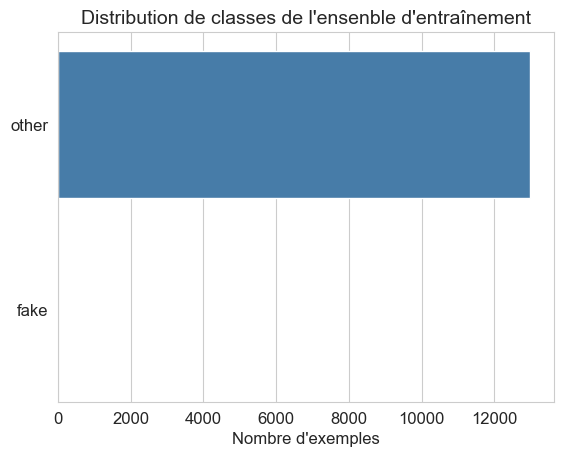

In [68]:
# Here we have a list of the color palettes: https://www.codecademy.com/article/seaborn-design-ii
# Another reference: https://medium.com/@morganjonesartist/color-guide-to-seaborn-palettes-da849406d44f
palette = sns.color_palette('Set1')
sns.set_style('whitegrid')
ax: 'plt.Axes' = sns.barplot(x=fake_df['rating'].value_counts(), y=fake_df['rating'].value_counts().index, orient='h', color=palette[1])
_ = ax.set_title("Distribution de classes de l'ensenble d'entraînement", size=14)
_ = ax.set_xlabel("Nombre d'exemples", fontsize=12)
ax.tick_params(axis='both', labelsize=12)
plt.show()

In [69]:
with pd.option_context('display.max_rows', 30,
                       'display.max_colwidth', 256,
                       ):
    display(fake_df.head(3))

id  \
0  6a175f46bcd24d39b3e962ad0f29936721db70db   
1  2bdc29d12605ef9cf3f09f9875040a7113be5d5b   
2  c70e149fdd53de5e61c29281100b9de0ed268bc3   

                                                                                                                                                                                                                                                              text  \
0  Print They should pay all the back all the money plus interest. The entire family and everyone who came in with them need to be deported asap. Why did it take two years to bust them? \nHere we go again …another group stealing from the government and ta...   
1  Why Did Attorney General Loretta Lynch Plead The Fifth? Barracuda Brigade 2016-10-28 Print The administration is blocking congressional probe into cash payments to Iran. Of course she needs to plead the 5th. She either can’t recall, refuses to answer, ...   
2  Red State : \nFox News Sunday reported this morning that Anthony Weiner is cooperating with the FBI, which has re-opened (yes, lefties: “re-opened”) the investigation into Hillary Clinton’s classified emails. Watch as Chris Wallace reports the breaking...   

                                                                  title rating  
0                 Muslims BUSTED: They Stole Millions In Gov’t Benefits  other  
1           Re: Why Did Attorney General Loretta Lynch Plead The Fifth?  other  
2  BREAKING: Weiner Cooperating With FBI On Hillary Email Investigation  other

<h5>
NOTES:

This is last dataset poses a big class balance problem. Most of them will be assigned to the `other` category. We could just take a part of it to avoid unbalancing the final data set.
</h5>